<a href="https://colab.research.google.com/github/Skye-Zhangg/Homework/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem.**
You may use a built-in package to implement your classifier. Additionally, do the following:
* Visualize the decision tree structure for at least three different  parameter settings.
* Comment on how the depth and complexity change the tree.
* Do some research on what sensitivity analysis is and how it is performed (include citations).
* Perform a sensitivity analysis to measure the impact of at least two input features on your model's decision boundary.

The coding and visualization are showed below. The decision tree with zero layers contains only a root node and does not perform any feature-based splits. As a result, it predicts the same class for all observations and fails to capture relationships between input features and the outcome. This model severely underfits the data and has no meaningful decision boundary.

The tree with three layers introduces several important splits based on key variables such as missed appointments, time since last visit, and out-of-pocket cost. This allows the model to capture the main patterns in the data while keeping the structure simple and interpretable. The resulting decision boundary consists of a small number of large regions, indicating stable and well-defined decision rules.

The five-layer tree further increases model complexity by adding more splits and leaf nodes. While this allows the model to learn more detailed patterns, it also makes the tree harder to interpret and leads to more fragmented decision boundaries. This increased sensitivity suggests a higher risk of overfitting.

Overall, increasing tree depth improves model flexibility but reduces interpretability and may negatively affect generalization.

Sensitivity analysis is a technique used to assess how alternative assumptions or analytical choices affect predefined research questions. In essence, it evaluates the robustness and reliability of the primary methodological or analytical approach.[1] By changing selected input features and observing how the model output responds, decision boundaries and feature interactions can be visualized using tools such as contour plots or heatmaps.[2] These visualizations help provide an intuitive understanding of how the model makes decisions. Previous studies have applied sensitivity analysis in predictive modeling to evaluate the influence of important input variables on classification results and to assess model robustness and reliability.[3] In this study, sensitivity analysis is conducted by varying two selected input features while holding all other features fixed, in order to examine their impact on the decision boundary of the decision tree classifier.

**Reference**

[1]. Mowbray, Fabrice I et al. “Sensitivity Analysis: A Method to Promote
Certainty and Transparency in Nursing and Health Research.” The Canadian journal of nursing research = Revue canadienne de recherche en sciences infirmieres vol. 54,4 (2022): 371-376. doi:10.1177/08445621221107108

[2]. Tunkiel, A. T., Sui, D., & Wiktorski, T. (2020). Data-driven sensitivity analysis of complex machine learning models: A case study of directional drilling. Journal of Petroleum Science and Engineering, 195, 107630.

[3]. Razavi, S., Jakeman, A., Saltelli, A., Prieur, C., Iooss, B., Borgonovo, E., ... & Maier, H. R. (2021). The future of sensitivity analysis: an essential discipline for systems modeling and policy support. Environmental Modelling & Software, 137, 104954.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nudratabbas/patient-churn-prediction-dataset-for-healthcare")

print("Path to dataset files:", path)

100%|██████████| 53.6k/53.6k [00:00<00:00, 34.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nudratabbas/patient-churn-prediction-dataset-for-healthcare/versions/1


In [2]:
import pandas as pd
import os
df = pd.read_csv(os.path.join(path, "patient_churn_dataset.csv"))
df.head()

,PatientID,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,...,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,C20000,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,...,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,C20001,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,...,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,C20002,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,...,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,C20003,65,Male,FL,118,General Practice,Private,10,3,135,...,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,C20004,18,Female,CA,70,Cardiology,Medicaid,5,4,696,...,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1


In [4]:
df.info()
df["Churned"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   Gender                      2000 non-null   object 
 3   State                       2000 non-null   object 
 4   Tenure_Months               2000 non-null   int64  
 5   Specialty                   2000 non-null   object 
 6   Insurance_Type              2000 non-null   object 
 7   Visits_Last_Year            2000 non-null   int64  
 8   Missed_Appointments         2000 non-null   int64  
 9   Days_Since_Last_Visit       2000 non-null   int64  
 10  Last_Interaction_Date       2000 non-null   object 
 11  Overall_Satisfaction        2000 non-null   float64
 12  Wait_Time_Satisfaction      2000 non-null   float64
 13  Staff_Satisfaction          2000 

,count
Churned,
1,1367
0,633


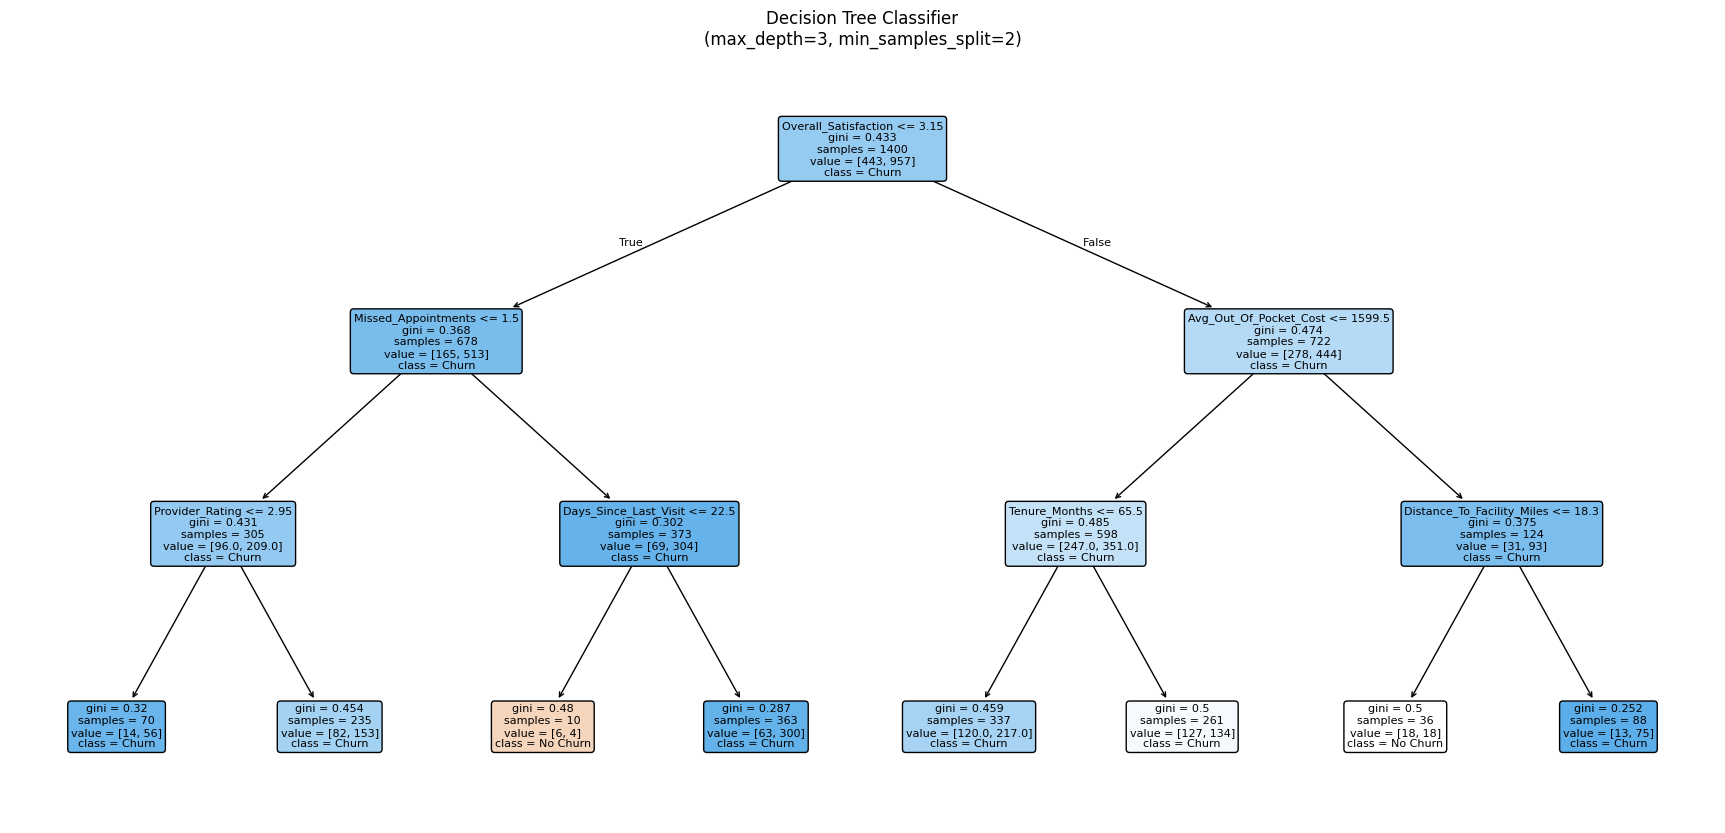

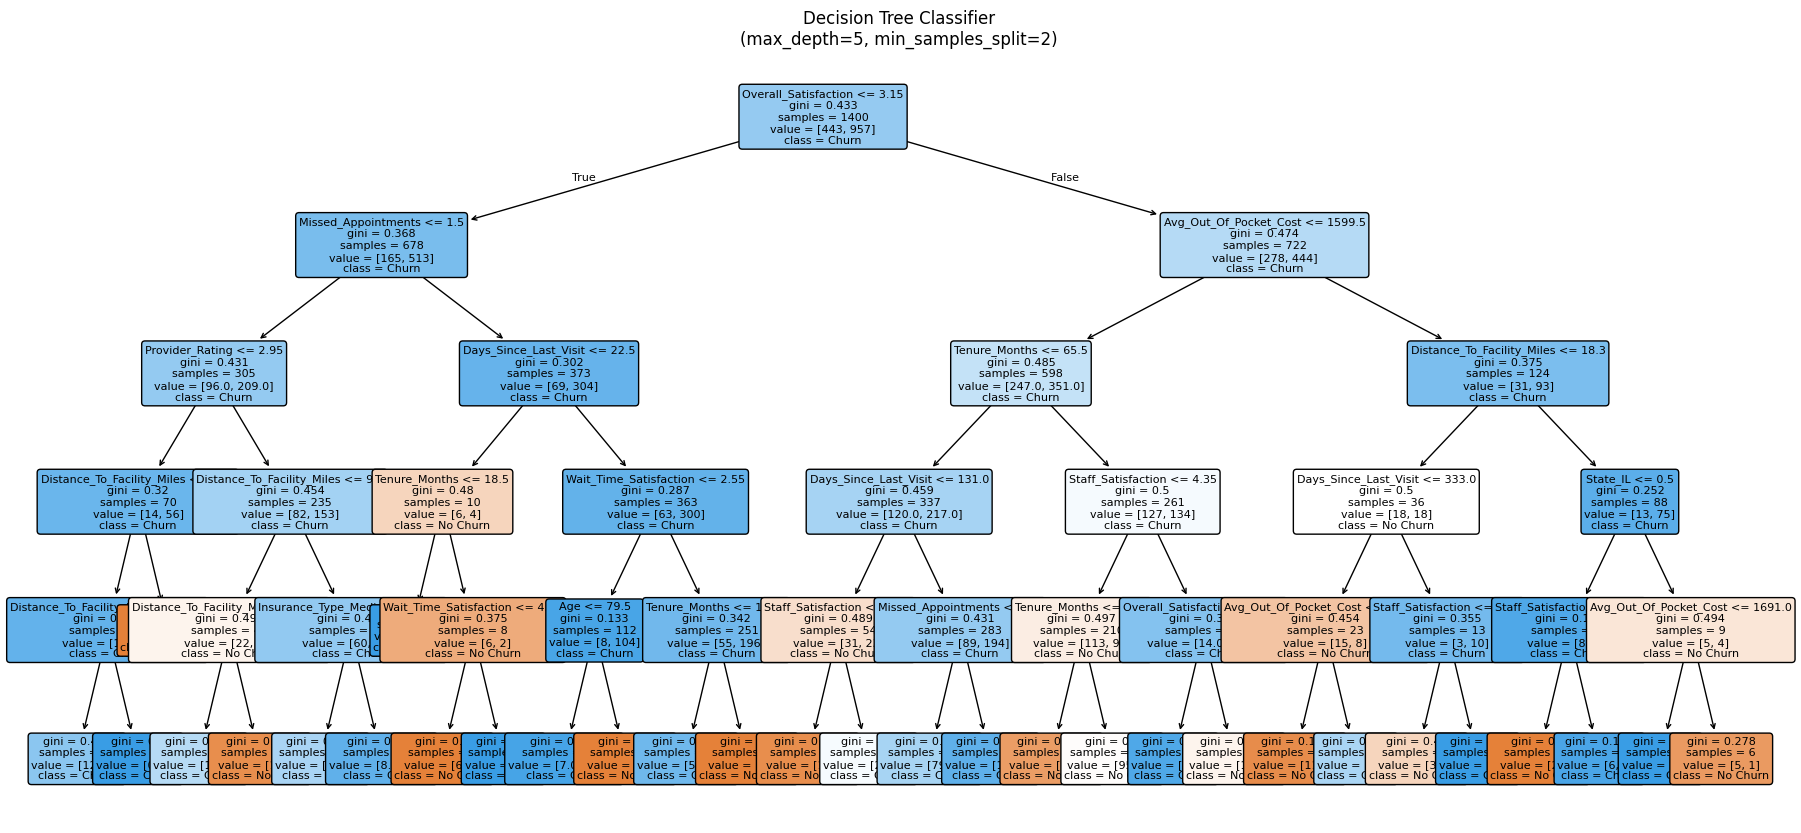

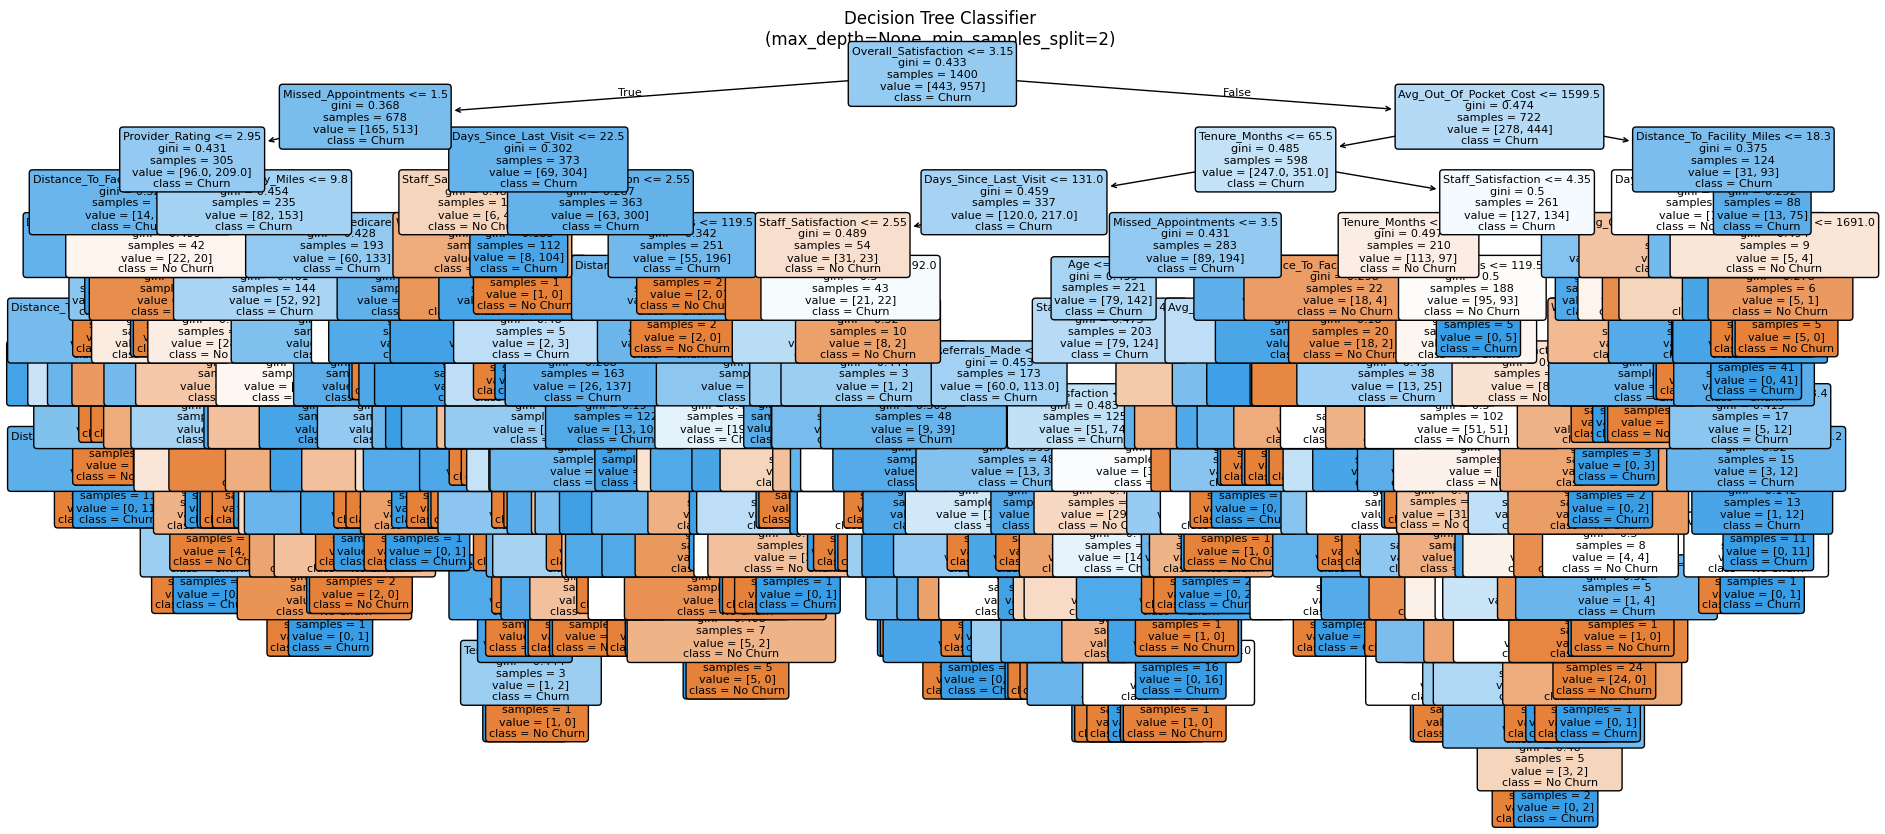

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
X = df.drop(columns=["Churned", "PatientID","Last_Interaction_Date"]) # drop ID + date + target
y = df['Churned']
#encode categorical variables
X = pd.get_dummies(X, drop_first=True)
# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
    random_state=50
)

def train_and_visualize_tree(depth_limit,min_split,seed=50):
    model = DecisionTreeClassifier(
        max_depth=depth_limit,
        min_samples_split=min_split,
        random_state=seed
    )

    model.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize=(22, 10))
    plot_tree(
        model,
        feature_names=X_train.columns,
        class_names=["No Churn", "Churn"],
        filled=True,
        rounded=True,
        fontsize=8,
        ax=ax
    )

    ax.set_title(
        f"Decision Tree Classifier\n"
        f"(max_depth={depth_limit}, min_samples_split={min_split})"
    )
    plt.show()

    return model

tree_a = train_and_visualize_tree(depth_limit=3, min_split=2)
tree_b = train_and_visualize_tree(depth_limit=5, min_split=2)
tree_c = train_and_visualize_tree(depth_limit=None, min_split=2)



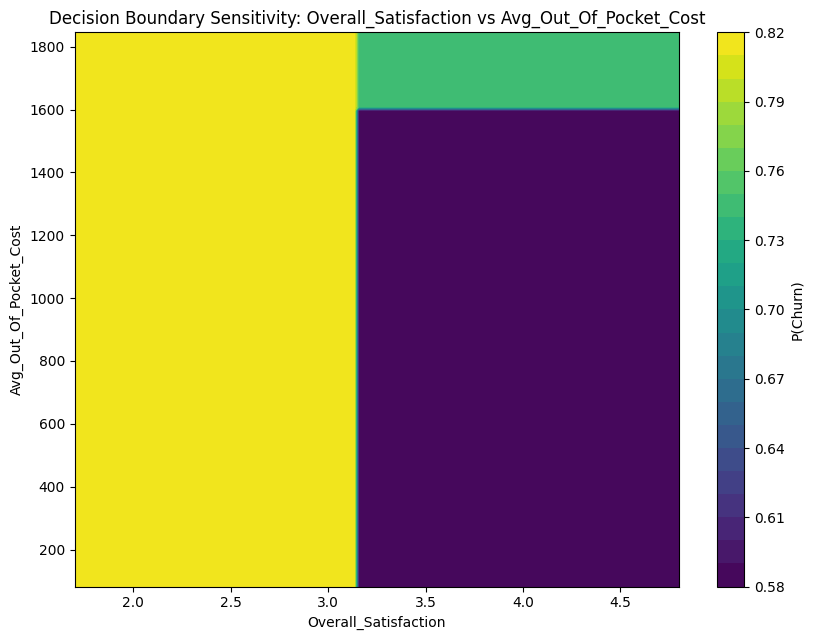

In [19]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
import numpy as np

# use balanced data to find the boundary
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
perm = permutation_importance(
    model, X_test, y_test,
    scoring="f1",
    n_repeats=15,
    random_state=42
)

feat1, feat2 = "Overall_Satisfaction", "Avg_Out_Of_Pocket_Cost"

def plot_boundary_slice(
    model,
    X_reference: pd.DataFrame,
    feature_x: str,
    feature_y: str,
    grid_size: int = 150,
    q_low: float = 0.05,
    q_high: float = 0.95
):
    # 1) fix other features
    fixed = X_reference.median(numeric_only=True)

    # 2) build a 2D grid for the two features
    x_vals = np.linspace(X_reference[feature_x].quantile(q_low),
                         X_reference[feature_x].quantile(q_high),
                         grid_size)
    y_vals = np.linspace(X_reference[feature_y].quantile(q_low),
                         X_reference[feature_y].quantile(q_high),
                         grid_size)
    xx, yy = np.meshgrid(x_vals, y_vals)

    # 3) create full input matrix (all columns), fill non-varied with fixed values
    grid = pd.DataFrame(
        {col: np.full(xx.size, fixed.get(col, 0.0)) for col in X_reference.columns}
    )
    grid[feature_x] = xx.ravel()
    grid[feature_y] = yy.ravel()

    # 4) predicted churn probability
    proba = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    # 5) plot: probability heatmap + decision boundary (p=0.5)
    plt.figure(figsize=(8.5, 6.5))
    im = plt.contourf(xx, yy, proba, levels=25)
    plt.colorbar(im, label="P(Churn)")

    plt.contour(xx, yy, proba, levels=[0.5], linewidths=2)  # boundary line

    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"Decision Boundary Sensitivity: {feature_x} vs {feature_y}")
    plt.tight_layout()
    plt.show()


plot_boundary_slice(model, X_train, feat1, feat2)




# **Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm from each category.**
Implement both the algorithms using the same data.
* Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15). You may do your own research on this technique (include citations).
* Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy, Precision, F1-score etc.).
* Comment on the behavior of each algorithm under the metrics. Does the performance ranking change based on the metric used? Why

Across all cross-validation settings, Bagging shows higher accuracy and F1-score, while Gradient Boosting consistently achieves higher precision. This suggests that Random Forest offers stronger overall and more balanced performance, whereas Gradient Boosting tends to be more cautious when predicting churn, resulting in fewer false positive predictions.

The ranking of the models changes depending on the evaluation metric. Bagging performs better when accuracy or F1-score is emphasized, but Gradient Boosting performs better when precision is the primary metric. This difference arises because boosting methods focus more on hard-to-classify samples, which can improve precision at the cost of recall, while bagging mainly reduces variance and produces more stable predictions.

In [23]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, f1_score

# dataset
def build_xy(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:
    y = df["Churned"].astype(int)

    X = df.drop(columns=["Churned", "PatientID", "Last_Interaction_Date"]).copy()

    # one-hot encode categorical features
    X = pd.get_dummies(X, drop_first=True)

    # ensure all numeric (defensive)
    for c in X.columns:
        if X[c].dtype == "object":
            X[c] = pd.to_numeric(X[c], errors="coerce")

    # simple imputation (tree models can’t handle NaN by default)
    if X.isna().any().any():
        X = X.fillna(X.median(numeric_only=True))

    return X, y


# define models
def build_models(seed: int = 50):
    bagging = RandomForestClassifier(
        n_estimators=200,
        random_state=seed,
        n_jobs=-1
    )

    boosting = GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        random_state=seed
    )

    return {
        "bagging_rf": bagging,
        "boosting_gb": boosting,
    }



# evaluation
def evaluate_models(models: dict, X: pd.DataFrame, y: pd.Series, folds=(5, 10, 15), seed=50) -> pd.DataFrame:
    scoring = {
        "accuracy": "accuracy",
        "precision": "precision",
        "f1": "f1",
    }

    rows = []
    for k in folds:
        cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

        for name, clf in models.items():
            out = cross_validate(
                clf, X, y,
                cv=cv,
                scoring=scoring,
                n_jobs=-1,
                return_train_score=False
            )

            rows.append({
                "model": name,
                "folds": k,
                "accuracy_mean": out["test_accuracy"].mean(),
                "accuracy_std": out["test_accuracy"].std(),
                "precision_mean": out["test_precision"].mean(),
                "precision_std": out["test_precision"].std(),
                "f1_mean": out["test_f1"].mean(),
                "f1_std": out["test_f1"].std(),
            })

    return pd.DataFrame(rows).sort_values(["folds", "model"]).reset_index(drop=True)



X, y = build_xy(df)
models = build_models(seed=50)
results_df = evaluate_models(models, X, y, folds=(5, 10, 15), seed=50)
results_df


,model,folds,accuracy_mean,accuracy_std,precision_mean,precision_std,f1_mean,f1_std
0,bagging_rf,5,0.683500,0.013000,0.693133,0.006200,0.806210,0.008683
1,boosting_gb,5,0.666500,0.014714,0.709247,0.006568,0.780418,0.011616
2,bagging_rf,10,0.677500,0.016317,0.689220,0.009361,0.803030,0.010302
3,boosting_gb,10,0.671000,0.026439,0.710639,0.010559,0.783747,0.020943
4,bagging_rf,15,0.678502,0.016292,0.690532,0.008190,0.803159,0.010464
5,boosting_gb,15,0.658504,0.028108,0.702073,0.019251,0.776802,0.019848


# **Task 3 (40 points): Compare the effectiveness of the three models implemented above.**
Analyze the results using the following:
* A confusion matrix for one selected test fold.
* A statistical test (e.g., paired t-test) to determine if differences between models are
significant.
* A discussion on the trade-off between bias and variance for each model.

The confusion matrices show differences among the models. The decision tree predicts all cases as churn, resulting in many false positives and indicating high bias. Bagging provides the most balanced predictions, correctly identifying both churned and non-churned patients with fewer errors. Boosting (Gradient Boosting) is more conservative, producing fewer false positives but more false negatives.

The paired t-test results indicate that the performance difference between Bagging and Boosting is statistically significant (p = 0.0441), while differences involving the Decision Tree are not significant. This suggests that Bagging offers a meaningful improvement over Boosting in terms of accuracy.

In terms of bias–variance trade-off, the Decision Tree suffers from high bias, Bagging reduces variance through aggregation, and Boosting reduces bias but is more sensitive to noise.

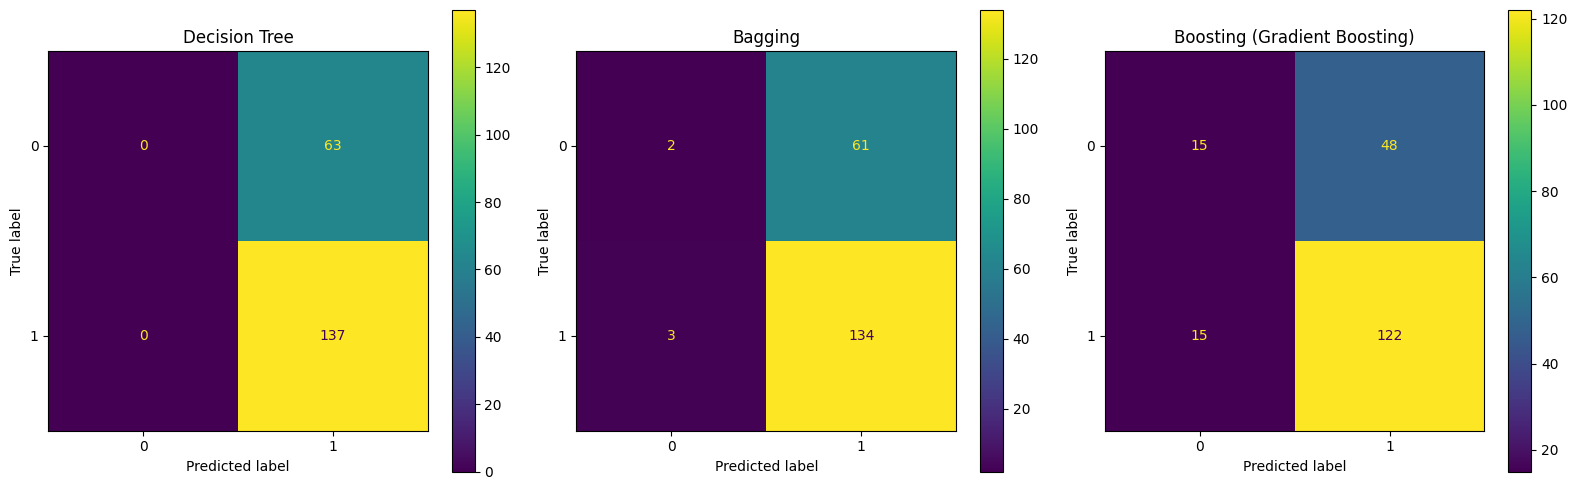

Decision Tree vs Bagging
  t-statistic = -1.1523
  p-value     = 0.2789

Decision Tree vs Boosting (Gradient Boosting)
  t-statistic = 1.4979
  p-value     = 0.1684

Bagging vs Boosting (Gradient Boosting)
  t-statistic = 2.3394
  p-value     = 0.0441



In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import ttest_rel
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=2,          # high bias, low variance
        random_state=50
    ),
    "Bagging": RandomForestClassifier(
        n_estimators=200,
        random_state=50,
        n_jobs=-1
    ),
    "Boosting (Gradient Boosting)": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        random_state=50
    )
}

# Confusion matrix
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
train_idx, test_idx = next(cv.split(X, y))

X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, (name, clf) in zip(axes, models.items()):
    clf.fit(X_tr, y_tr)
    ConfusionMatrixDisplay.from_estimator(
        clf,
        X_te,
        y_te,
        ax=ax
    )
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Paired t-test using cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = {}

for name, clf in models.items():
    scores = cross_val_score(
        clf,
        X,
        y,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )
    cv_scores[name] = scores
def paired_test(a_name, b_name):
    t_stat, p_val = ttest_rel(
        cv_scores[a_name],
        cv_scores[b_name]
    )
    print(f"{a_name} vs {b_name}")
    print(f"  t-statistic = {t_stat:.4f}")
    print(f"  p-value     = {p_val:.4f}\n")


paired_test("Decision Tree", "Bagging")
paired_test("Decision Tree", "Boosting (Gradient Boosting)")
paired_test("Bagging", "Boosting (Gradient Boosting)")


# **Task (50 points): For the same classification problem solved above, implement the XGBoost algorithm.**

If you picked XGBoost as one of the boosting algorithms in task 2, you may use the
same implementation. Implement and evaluate XGBoost with the following requirements:
1. Perform a grid search or random search over at least 3 hyperparameters, such as learning rate, max depth, and subsample.
2. Analyze the sensitivity of your model to changes in these parameters.
3. Optional (no points taken off if not done) - Create plots to show the effect of each parameter on accuracy and another metric.

XGBoost was applied to the churn prediction task and tuned using randomized search with cross-validation. Key hyperparameters, including learning rate, max depth, subsample, number of estimators, and column sampling rate, were optimized using F1-score as the evaluation metric. The best model achieved a cross-validated F1-score of 0.812, with a low learning rate (0.01) and shallow tree depth (max_depth = 2).

Sensitivity analysis shows that model performance is highly dependent on the learning rate, with both accuracy and F1-score decreasing as the learning rate increases. In contrast, max depth has a smaller impact on performance within the tested range, and moderate subsampling improves generalization.

A two-dimensional heatmap of learning rate and max depth confirms these findings, with the highest F1-scores concentrated in the low learning-rate and shallow-depth region. Overall, the results indicate that XGBoost performs best when model updates are conservative and complexity is carefully controlled.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

Target = "Churned"
drop_cols = ["PatientID", "Last_Interaction_Date"]

y = df[Target].astype(int)
X = df.drop(columns=[Target] + drop_cols).copy()

cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_features),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_features),
    ],
    remainder="drop"
)


In [30]:
seed = 50
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=seed,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("xgb", xgb_base)
])

param_dist = {
    "xgb__n_estimators": [100, 200, 400, 600],
    "xgb__learning_rate": np.linspace(0.01, 0.3, 12),
    "xgb__max_depth": [2, 3, 4, 5, 6, 8],
    "xgb__subsample": np.linspace(0.6, 1.0, 5),
    "xgb__colsample_bytree": np.linspace(0.6, 1.0, 5),
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring={"accuracy": "accuracy", "f1": "f1"},
    refit="f1",
    cv=cv5,
    n_jobs=-1,
    random_state=seed,
    return_train_score=False
)

search.fit(X, y)

print("Best params:", search.best_params_)
print("Best CV F1:", search.best_score_)


Best params: {'xgb__subsample': np.float64(0.9), 'xgb__n_estimators': 100, 'xgb__max_depth': 2, 'xgb__learning_rate': np.float64(0.01), 'xgb__colsample_bytree': np.float64(0.7)}
Best CV F1: 0.8119981834295263


In [32]:
def cv_summary(estimator, X, y, n_splits, seed=50):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    out = cross_validate(
        estimator, X, y,
        cv=cv,
        scoring={"accuracy": "accuracy", "f1": "f1"},
        n_jobs=-1
    )
    return {
        "folds": n_splits,
        "acc_mean": out["test_accuracy"].mean(),
        "acc_std": out["test_accuracy"].std(),
        "f1_mean": out["test_f1"].mean(),
        "f1_std": out["test_f1"].std(),
    }

best_model = search.best_estimator_

rows = [cv_summary(best_model, X, y, k) for k in (5, 10, 15)]
pd.DataFrame(rows)


,folds,acc_mean,acc_std,f1_mean,f1_std
0,5,0.683500,0.001225,0.811998,0.000864
1,10,0.683500,0.002291,0.811997,0.001619
2,15,0.683504,0.002336,0.811999,0.001650


In [33]:
def sweep_one_param(best_estimator, param_name, values, X, y, cv_splits=5, seed=50):

    # returns dataFrame with accuracy_mean and f1_mean.

    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=seed)

    rows = []
    for v in values:
        est = best_estimator
        est.set_params(**{param_name: v})

        out = cross_validate(
            est, X, y,
            cv=cv,
            scoring={"accuracy": "accuracy", "f1": "f1"},
            n_jobs=-1
        )

        rows.append({
            "param": param_name,
            "value": v,
            "accuracy": out["test_accuracy"].mean(),
            "f1": out["test_f1"].mean(),
        })

    return pd.DataFrame(rows)

best = search.best_estimator_

lr_vals = np.linspace(0.01, 0.3, 15)
depth_vals = [2, 3, 4, 5, 6, 8, 10]
sub_vals = np.linspace(0.6, 1.0, 9)

df_lr = sweep_one_param(best, "xgb__learning_rate", lr_vals, X, y)
df_md = sweep_one_param(best, "xgb__max_depth", depth_vals, X, y)
df_ss = sweep_one_param(best, "xgb__subsample", sub_vals, X, y)


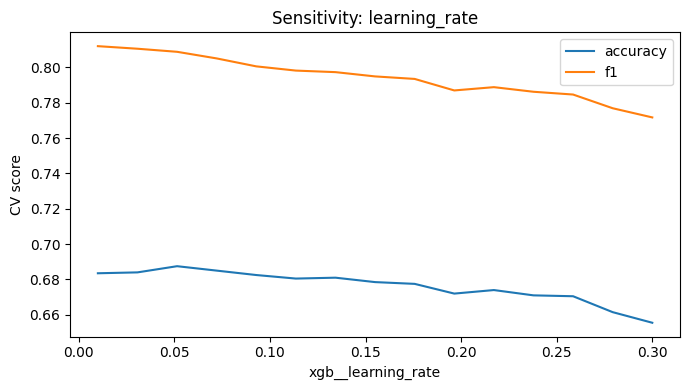

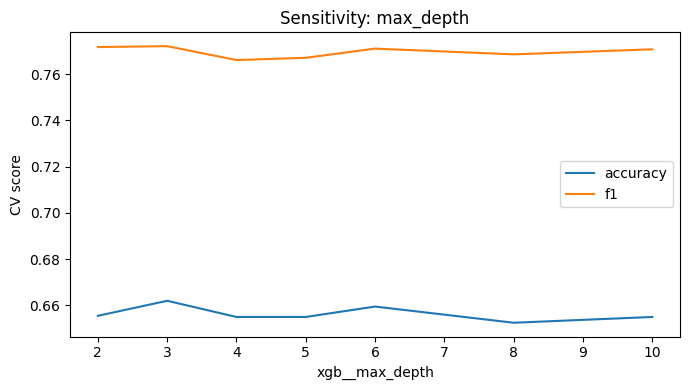

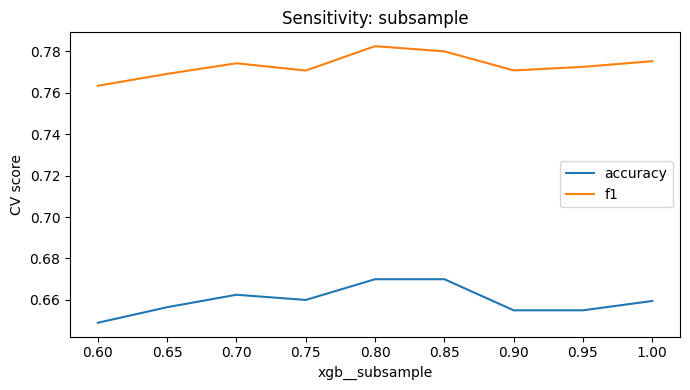

In [34]:
def plot_sensitivity(df_sens, title):
    plt.figure(figsize=(7, 4))
    plt.plot(df_sens["value"], df_sens["accuracy"], label="accuracy")
    plt.plot(df_sens["value"], df_sens["f1"], label="f1")
    plt.xlabel(df_sens["param"].iloc[0])
    plt.ylabel("CV score")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sensitivity(df_lr, "Sensitivity: learning_rate")
plot_sensitivity(df_md, "Sensitivity: max_depth")
plot_sensitivity(df_ss, "Sensitivity: subsample")


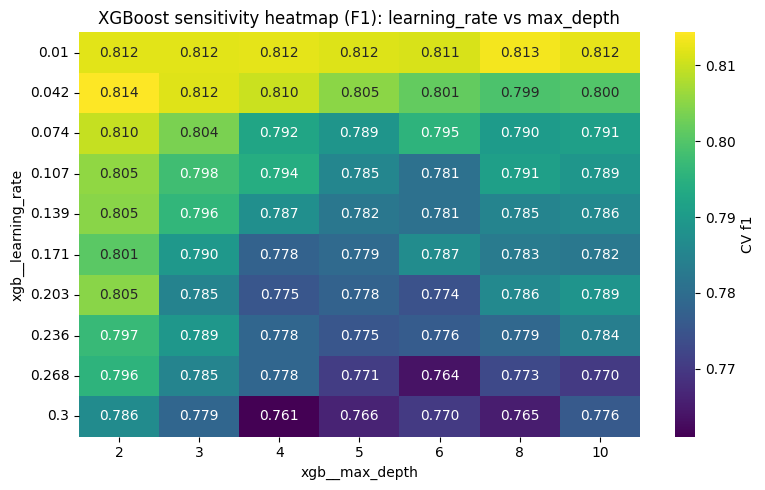

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
def sweep_2d(best_estimator, p1, v1, p2, v2, X, y, cv_splits=5, seed=42):
# returns dataframe with mean accuracy and mean f1 for each pair.
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=seed)
    rows = []

    for a in v1:
        for b in v2:
            est = best_estimator
            est.set_params(**{p1: a, p2: b})

            out = cross_validate(
                est, X, y,
                cv=cv,
                scoring={"accuracy": "accuracy", "f1": "f1"},
                n_jobs=-1
            )

            rows.append({
                p1: a,
                p2: b,
                "accuracy": out["test_accuracy"].mean(),
                "f1": out["test_f1"].mean()
            })

    return pd.DataFrame(rows)
def plot_sns_heatmap(df2d, p1, p2, score_col, title):
    pivot = df2d.pivot(index=p1, columns=p2, values=score_col)

    plt.figure(figsize=(8, 5))
    sns.heatmap(
        pivot,
        annot=True,
        fmt=".3f",
        cmap="viridis",
        cbar_kws={"label": f"CV {score_col}"}
    )

    plt.xlabel(p2)
    plt.ylabel(p1)
    plt.title(title)
    plt.tight_layout()
    plt.show()
best = search.best_estimator_

lr_grid = np.round(np.linspace(0.01, 0.30, 10), 3)
depth_grid = [2, 3, 4, 5, 6, 8, 10]

df_lr_depth = sweep_2d(
    best_estimator=best,
    p1="xgb__learning_rate", v1=lr_grid,
    p2="xgb__max_depth",    v2=depth_grid,
    X=X, y=y,
    cv_splits=5,
    seed=42
)
plot_sns_heatmap(
    df_lr_depth,
    "xgb__learning_rate",
    "xgb__max_depth",
    "f1",
    "XGBoost sensitivity heatmap (F1): learning_rate vs max_depth"
)
